In [8]:
from pycaret.classification import *

In [42]:
import seaborn as sns

In [1]:
df = pd.read_csv("../MACH_data/cut_off_by_avg_over_18age.csv")
df.tail()

,Unnamed: 0,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
44562,53015,4.0,15.0,5.0,1.0,16.0,5.0,1.0,10.0,5.0,...,Agnostic,Homosexual,White,Yes,Never married,3,83.0,42.0,34.0,7.0
44563,53016,5.0,1.0,10.0,5.0,13.0,5.0,4.0,15.0,11.0,...,Other,Heterosexual,Asian,No,Never married,1,64.0,31.0,26.0,7.0
44564,53017,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
44565,53018,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0
44566,53019,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,...,Agnostic,Heterosexual,White,No,Never married,3,69.0,34.0,27.0,8.0


In [2]:
df.shape

(44567, 109)

In [3]:
df.columns[40:]

Index(['Q14_VN_ppl_brave', 'Q14I', 'Q14E_ppl_brave', 'Q15_TP_abu_good', 'Q15I',
       'Q15E_abu_good', 'Q16_TN_ppl_good', 'Q16I', 'Q16E_ppl_good',
       'Q17_VN_ppl_notbad', 'Q17I', 'Q17E_ppl_notbad', 'Q18_VP_komsu_better',
       'Q18I', 'Q18E_komsu_better', 'Q19_MP_anrocksa_ok', 'Q19I',
       'Q19E_anrocksa_ok', 'Q20_VP_money_good', 'Q20I', 'Q20E_money_good',
       'country', 'introelapse', 'testelapse', 'surveyelapse', 'TYP_out',
       'TYP_fight', 'TYP_depnd', 'TYP_anx', 'TYP_try', 'TYP_quiet', 'TYP_warm',
       'TYP_disorg', 'TYP_calm', 'TYP_stable', 'VCL1', 'VCL2', 'VCL3', 'VCL4',
       'VCL5', 'VCL6_F', 'VCL7', 'VCL8', 'VCL9_F', 'VCL10', 'VCL11', 'VCL12_F',
       'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education', 'urban', 'gender',
       'engnat', 'age', 'screenw', 'screenh', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'score',
       'v_score', 't_score', 'm_score'],
      dtype='object')

In [4]:
id_cols = ['education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation', 'race', 'voted', 'married', 'familysize', 'country']

In [5]:
df_id = df[id_cols]
df_id.tail()

,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize,country
44562,University degree,Urban,Male,Yes,19,Right,Agnostic,Homosexual,White,Yes,Never married,3,CA
44563,University degree,Urban,Male,Yes,22,Right,Other,Heterosexual,Asian,No,Never married,1,IE
44564,Graduate degree,Urban,Male,No,29,Right,Other,Heterosexual,Asian,No,Currently married,1,US
44565,High school,Suburban,Female,No,20,Right,Atheist,Homosexual,White,No,Never married,2,PL
44566,High school,Urban,Male,No,31,Right,Agnostic,Heterosexual,White,No,Never married,3,RO


In [24]:
clf = setup(data = df_id, target = 'voted', normalize=True, normalize_method='minmax')

Setup Succesfully Completed!


,Description,Value
0,session_id,3726
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(44567, 13)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [25]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.6296,0.6734,0.7586,0.6206,0.6827,0.2484,0.2557,0.9241
1,CatBoost Classifier,0.6273,0.6734,0.7205,0.6267,0.6701,0.2467,0.2501,3.3259
2,Ada Boost Classifier,0.6289,0.6726,0.7385,0.6240,0.6763,0.2487,0.2538,0.4682
3,Light Gradient Boosting Machine,0.6269,0.6698,0.7043,0.6296,0.6647,0.2471,0.2492,0.0919
4,Logistic Regression,0.6225,0.6657,0.6777,0.6309,0.6534,0.2402,0.2410,0.0831
5,Linear Discriminant Analysis,0.6221,0.6623,0.6802,0.6297,0.6539,0.2390,0.2399,0.1337
6,Extreme Gradient Boosting,0.6168,0.6596,0.6936,0.6213,0.6553,0.2268,0.2287,4.4725
7,Random Forest Classifier,0.5825,0.6234,0.5584,0.6128,0.5842,0.1667,0.1676,0.1154
8,Extra Trees Classifier,0.5793,0.6157,0.6015,0.5992,0.6002,0.1562,0.1562,0.2548
9,K Neighbors Classifier,0.5804,0.6030,0.6536,0.5911,0.6207,0.1538,0.1548,0.0597


#### catboost 

In [31]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6346,0.6783,0.7409,0.6295,0.6807,0.2602,0.2650
1,0.6170,0.6696,0.7713,0.6067,0.6792,0.2205,0.2304
2,0.6554,0.6885,0.7896,0.6395,0.7067,0.3002,0.3101
3,0.6202,0.6415,0.7470,0.6140,0.6740,0.2294,0.2357
4,0.6266,0.6602,0.7530,0.6190,0.6795,0.2424,0.2491
5,0.6282,0.6951,0.7622,0.6188,0.6831,0.2450,0.2528
6,0.6619,0.7125,0.7835,0.6474,0.7090,0.3141,0.3223
7,0.6314,0.6635,0.7615,0.6209,0.6841,0.2526,0.2602
8,0.6026,0.6485,0.7309,0.5990,0.6584,0.1943,0.1999
9,0.6180,0.6762,0.7462,0.6115,0.6722,0.2251,0.2316


In [32]:
gbc_df = pull()

In [33]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6298,0.6782,0.6890,0.6366,0.6618,0.2543,0.2553
1,0.6458,0.6808,0.7530,0.6382,0.6909,0.2828,0.2882
2,0.6506,0.6848,0.7195,0.6519,0.6841,0.2955,0.2973
3,0.6394,0.6628,0.7195,0.6396,0.6772,0.2720,0.2745
4,0.6186,0.6482,0.6860,0.6250,0.6541,0.2311,0.2324
5,0.6282,0.6790,0.7073,0.6304,0.6667,0.2495,0.2516
6,0.6458,0.6970,0.6982,0.6524,0.6745,0.2871,0.2879
7,0.6106,0.6458,0.6850,0.6154,0.6483,0.2149,0.2164
8,0.5865,0.6587,0.6728,0.5930,0.6304,0.1655,0.1672
9,0.6132,0.6627,0.7125,0.6132,0.6591,0.2178,0.2211


In [34]:
lgbm_df = pull()

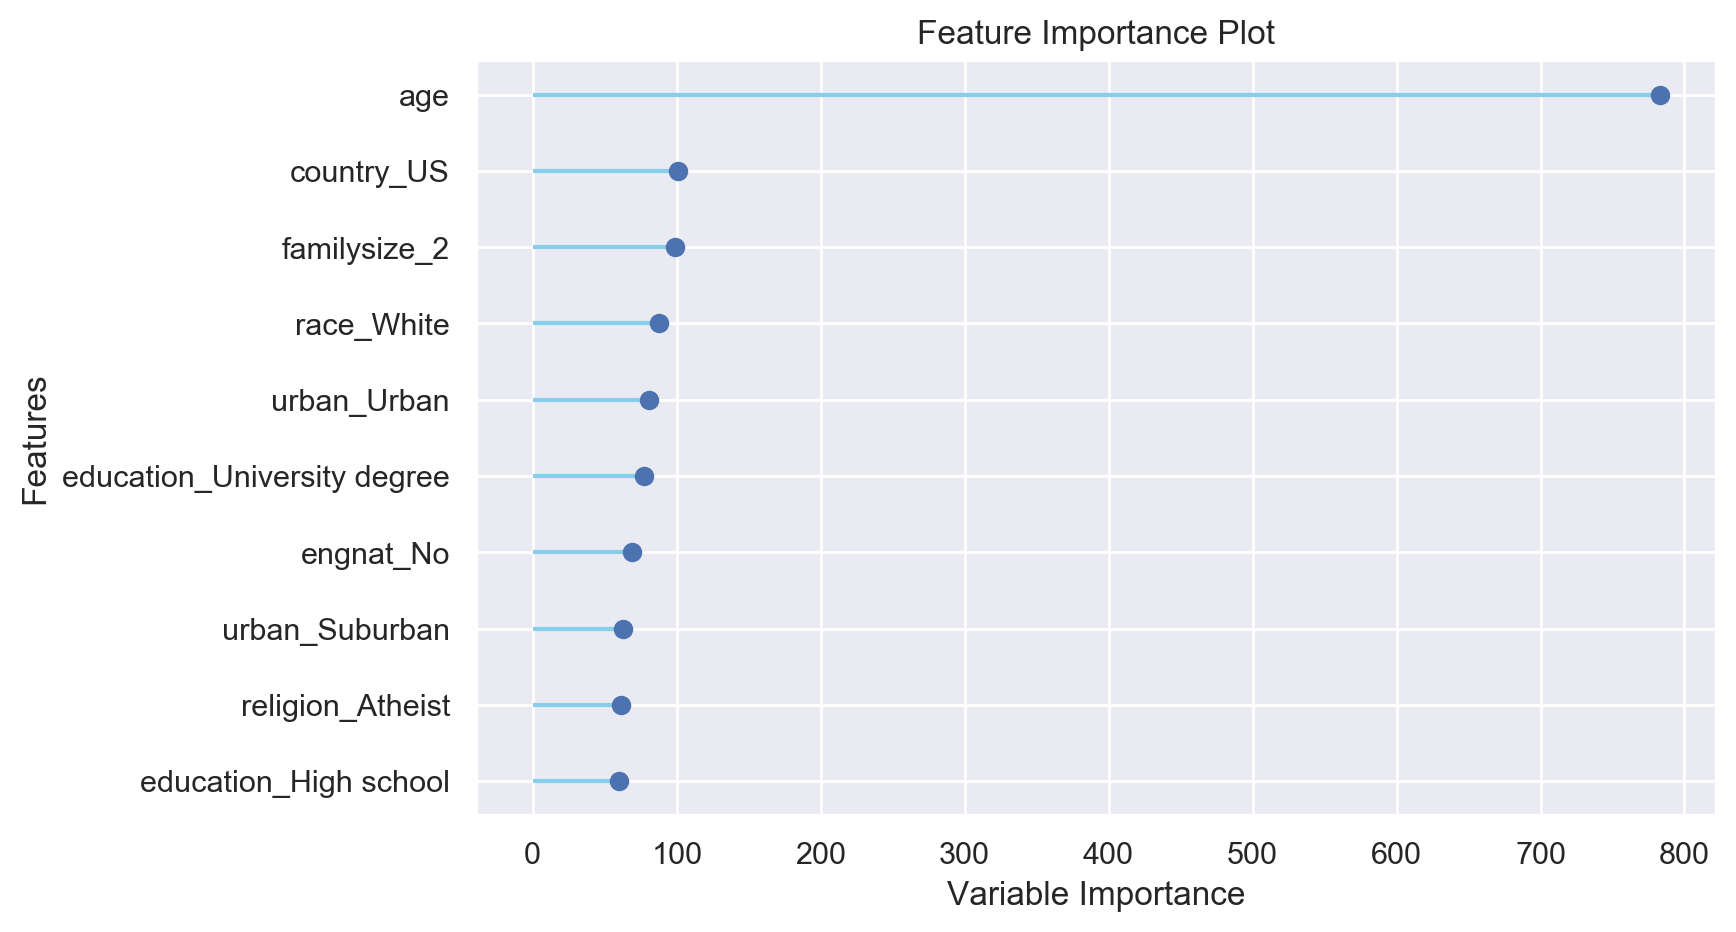

In [38]:
plot_model(estimator=lgbm, plot = "feature")

In [39]:
lgbm_cols = ["age", "country_US", "familysize_2", "race_White", "urban_Urban", "education_University degree", "engnat_No", "urban_Suburban", "religion_Atheist", "education_High school"]

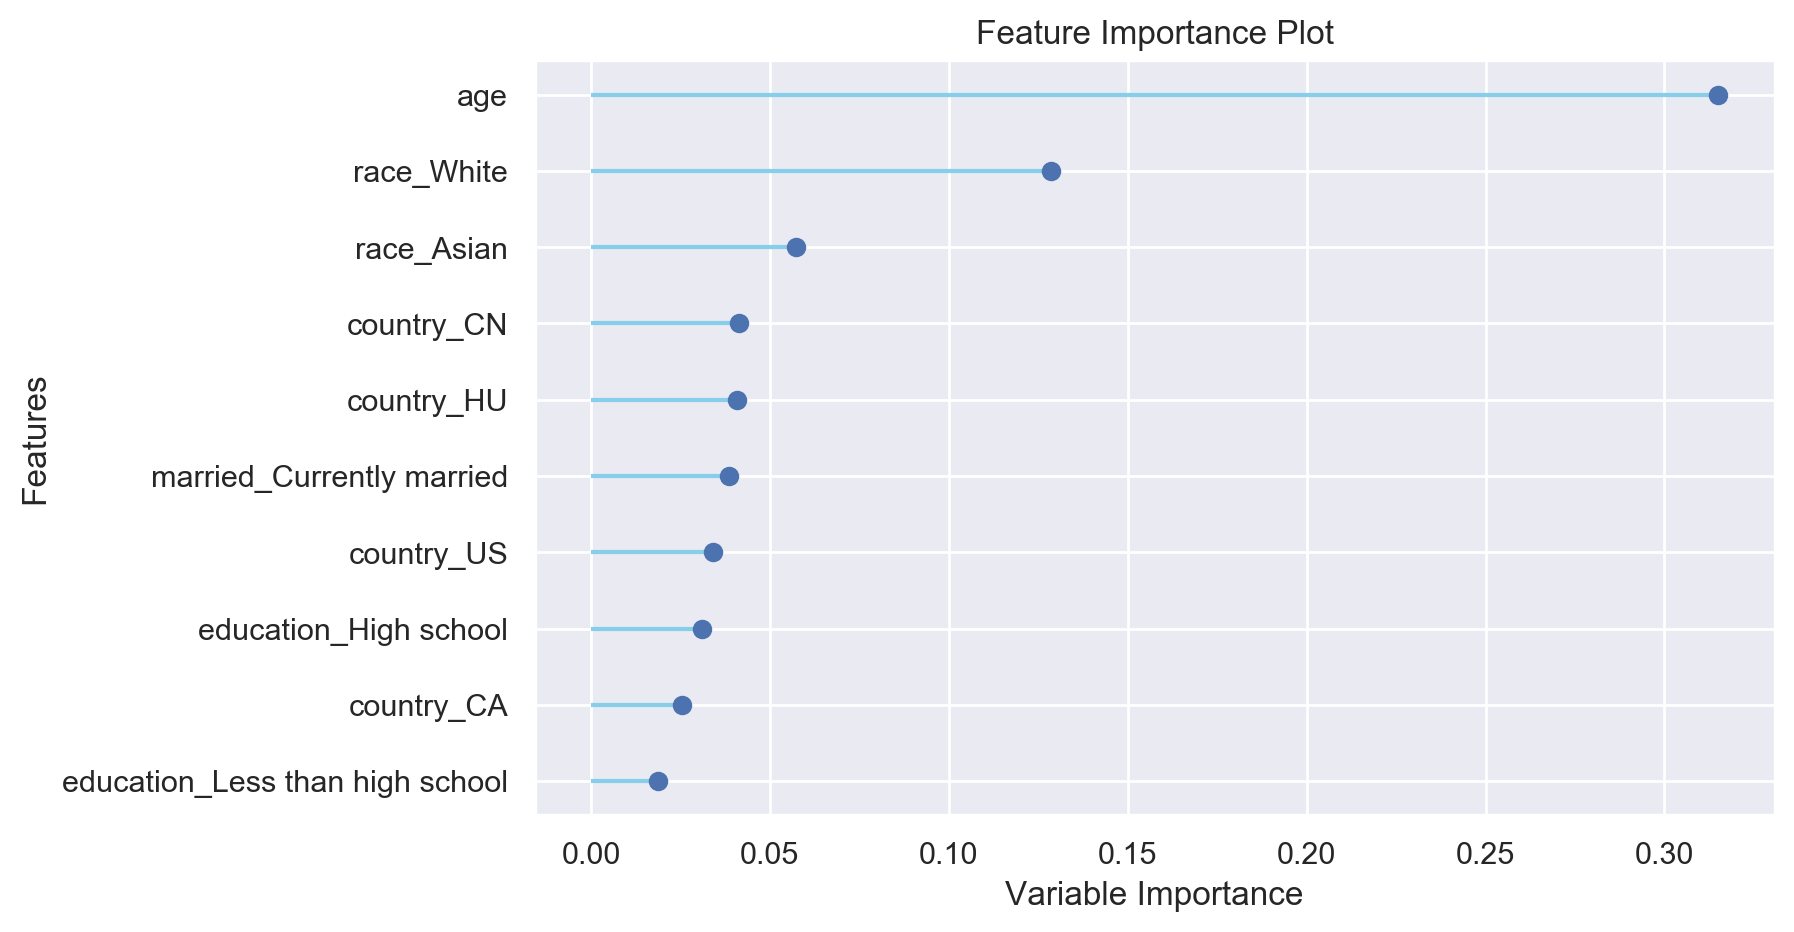

In [37]:
plot_model(estimator=gbc, plot = "feature")

In [40]:
gbc_cols = ["age", "race_White", "race_Asian", "country_CN", "coutry_HU", "married_Currently married", "country_US", "eductaion_High school", "country_CA", "education_Less than high school"]

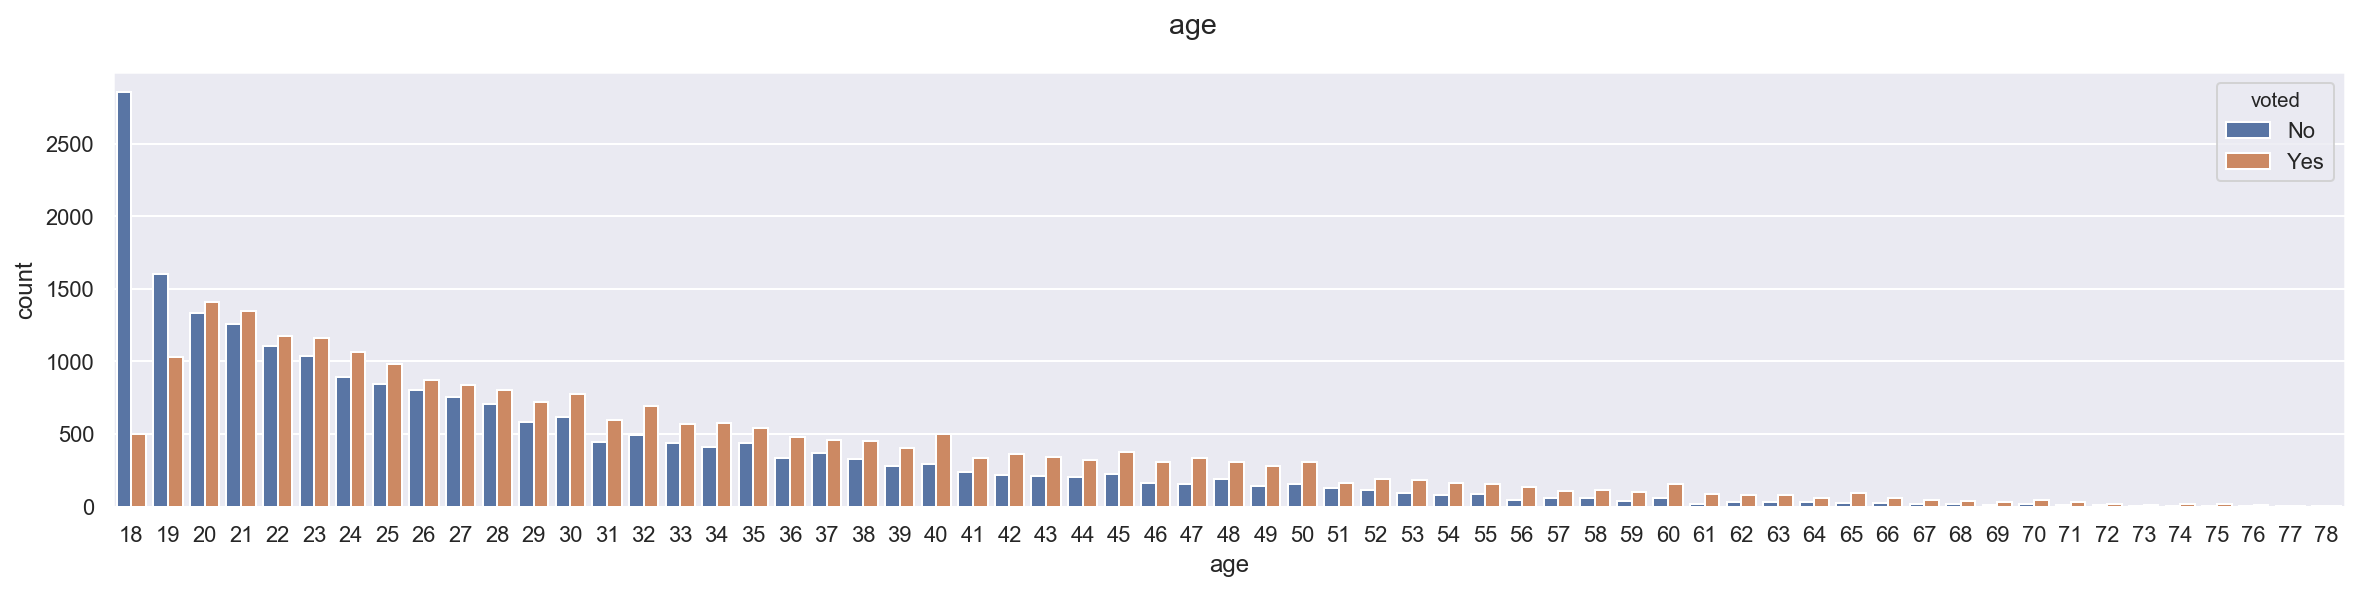

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)

fig.suptitle('age')


sns.countplot(df["age"], hue=df["voted"])


plt.show()

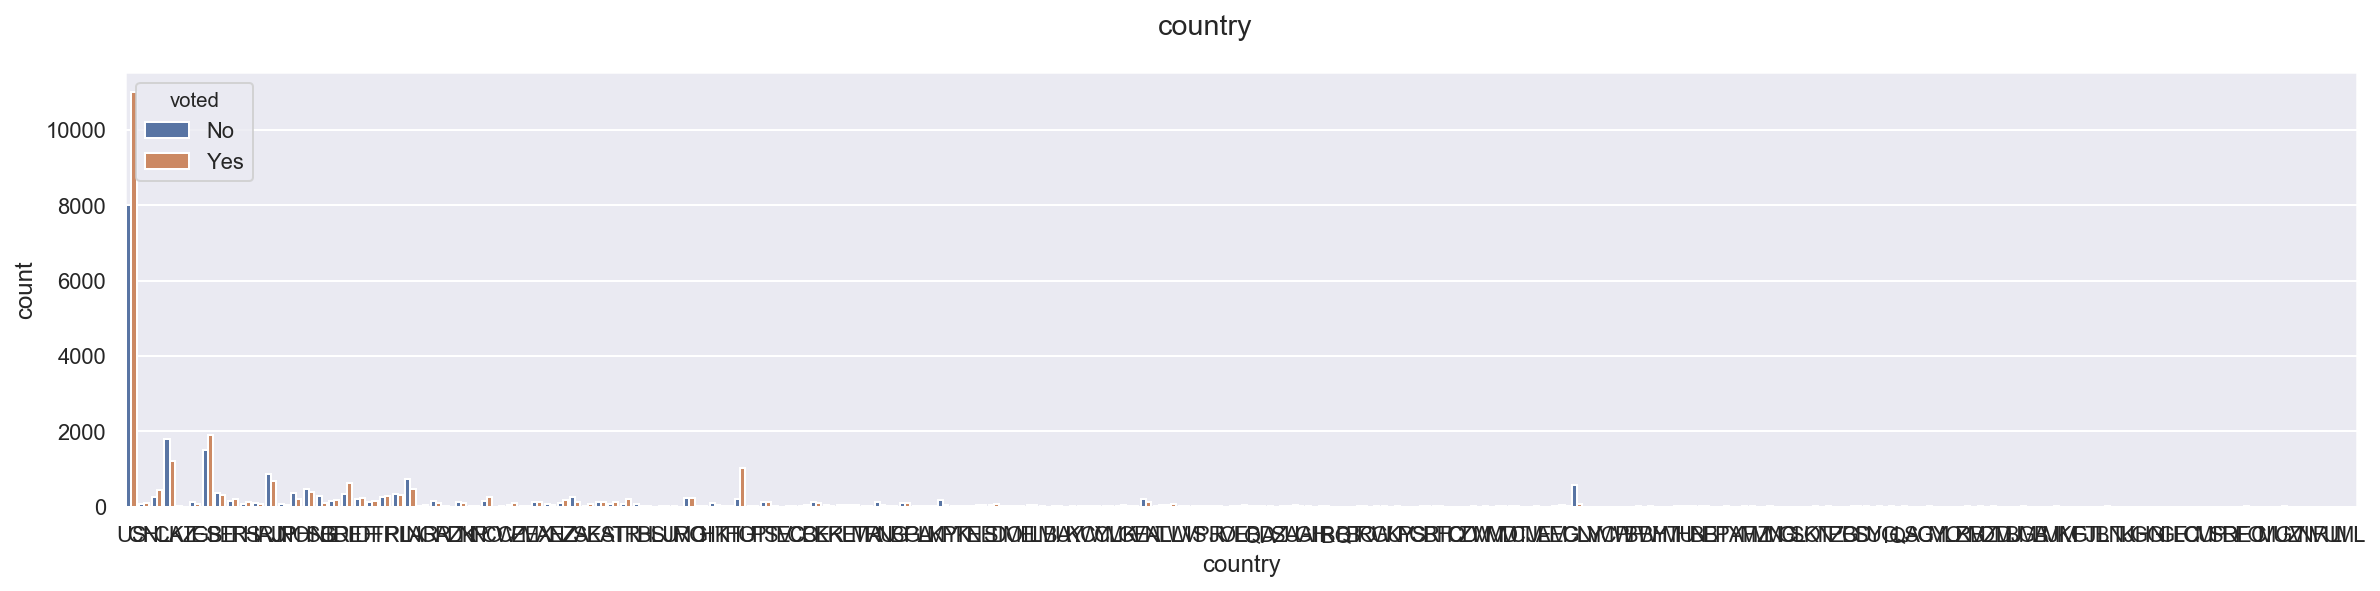

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)

fig.suptitle('country')


sns.countplot(df["country"], hue=df["voted"])


plt.show()

In [55]:
df_cntr = pd.DataFrame(df["country"].value_counts())

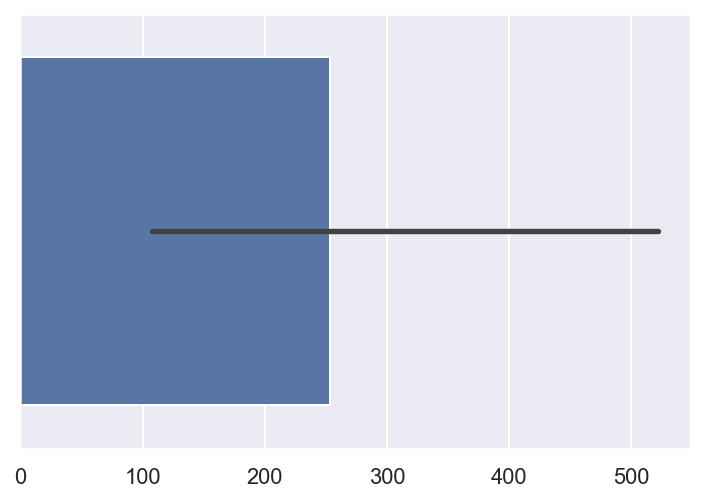

In [58]:
sns.barplot(df_cntr["country"], )